In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sql
from db import Database

In [9]:
conn = Database(dict()).con
df = pd.read_sql_query(sql.query, conn)

In [12]:
by_year = df.groupby("year")["state"].count()
pivot = pd.pivot_table(df, values='mass',columns='country')

In [10]:
pivot[['US','RU']]
df.year

0      1880
1      1951
2      1952
3      1976
4      1902
       ... 
978    1934
979    2011
980    1869
981    1922
982    1905
Name: year, Length: 983, dtype: int64

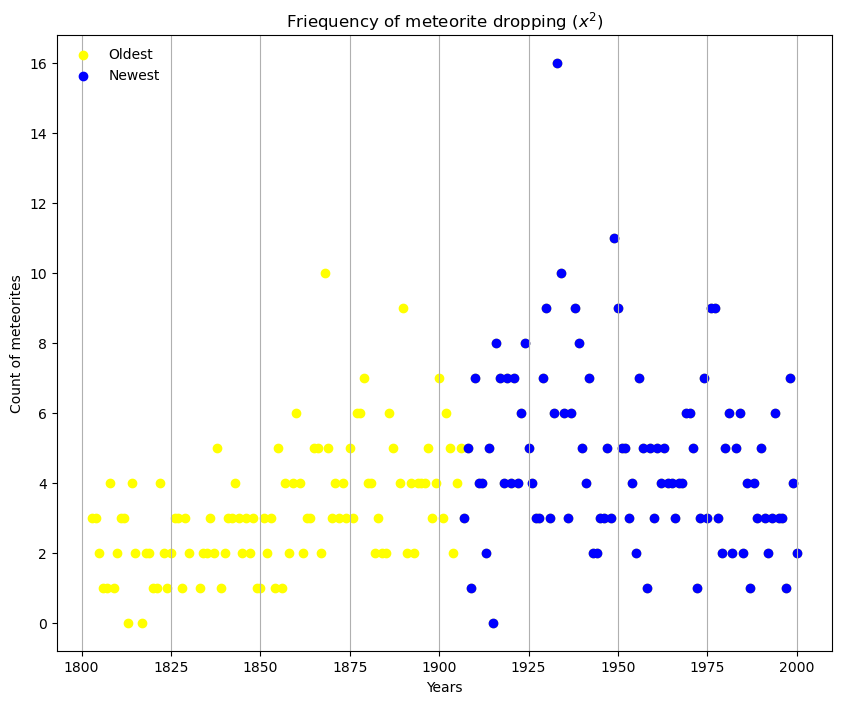

In [20]:
plt.figure(figsize=(10,8))

x = by_year.loc[1800:2000].index
y = by_year.loc[1800:2000]

plt.scatter(x, y, c='yellow', label='Oldest')
plt.scatter(x[100:] ,y[100:], c='blue', label='Newest')

#add titles
plt.xlabel('Years')
plt.ylabel('Count of meteorites')
plt.title('Friequency of meteorite dropping ($x^2$)')

#add legend
plt.legend(loc=2, frameon=False)

#add grid
plt.gca().grid(visible=True, axis='x')

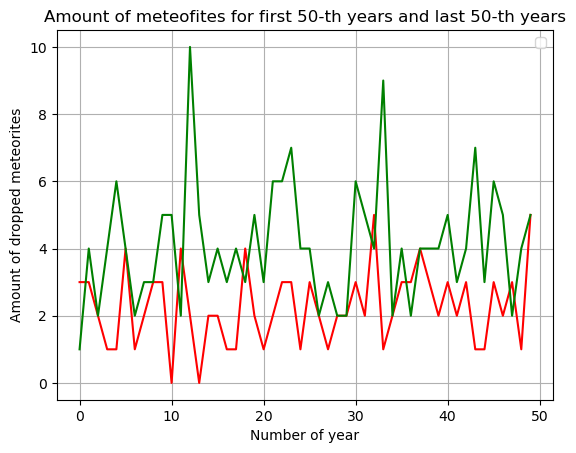

In [14]:
plt.figure()

plt.xlabel('Number of year')
plt.ylabel('Amount of dropped meteorites')
plt.title('Amount of meteofites for first 50-th years and last 50-th years')

#Creating a label from list
plt.legend(['From 1900 to 2000', 'From 1950 to 2000'])

d = y.loc[-100:].values

plt.plot(d[:50], '-r', d[50:100], '-g')

plt.gca().grid(visible=True)